In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MaxNLocator
import random

In [14]:
def initialize_forest(n):
    forest = np.zeros((n, n))
    middle = n // 2
    forest[middle, middle] = 1  # Pohon tengah terbakar
    return forest

In [15]:
def spread_fire(site, probBurning):
    if site == 1 and random.random() < probBurning:
        return 2  # Pohon terbakar
    return 1  # Pohon tetap hidup

In [16]:
def simulate_fire(forest, probBurning, num_iterations):
    n = forest.shape[0]
    forest_history = [np.copy(forest)]

    for _ in range(num_iterations):
        new_forest = np.copy(forest)
        for i in range(1, n - 1):
            for j in range(1, n - 1):
                new_forest[i, j] = spread_fire(forest[i, j], probBurning)
        forest = new_forest
        forest_history.append(np.copy(forest))

    return forest_history

In [17]:
def calculate_burn_percentage(forest):
    total_cells = forest.size
    burned_cells = np.count_nonzero(forest == 2)
    return (burned_cells / total_cells) * 100

In [18]:
# Simulasi untuk setiap probabilitas
probabilities = np.arange(0.1, 1.0, 0.1)
average_percent_burned = []

for prob in probabilities:
    total_burn_percentage = 0
    num_experiments = 10

    for _ in range(num_experiments):
        forest = initialize_forest(17)
        forest_history = simulate_fire(forest, prob, 10)
        final_forest = forest_history[-1]
        burn_percentage = calculate_burn_percentage(final_forest)
        total_burn_percentage += burn_percentage

    average_burn_percentage = total_burn_percentage / num_experiments
    average_percent_burned.append(average_burn_percentage)

    # Print hasil perhitungan untuk setiap probabilitas
    print(f"Probabilitas: {prob:.1f}, Rata-rata Persentase Terbakar: {average_burn_percentage:.2f}%")

Probabilitas: 0.1, Rata-rata Persentase Terbakar: 7.40%
Probabilitas: 0.2, Rata-rata Persentase Terbakar: 11.25%
Probabilitas: 0.3, Rata-rata Persentase Terbakar: 17.72%
Probabilitas: 0.4, Rata-rata Persentase Terbakar: 20.90%
Probabilitas: 0.5, Rata-rata Persentase Terbakar: 24.88%
Probabilitas: 0.6, Rata-rata Persentase Terbakar: 29.52%
Probabilitas: 0.7, Rata-rata Persentase Terbakar: 33.88%
Probabilitas: 0.8, Rata-rata Persentase Terbakar: 40.83%
Probabilitas: 0.9, Rata-rata Persentase Terbakar: 50.48%


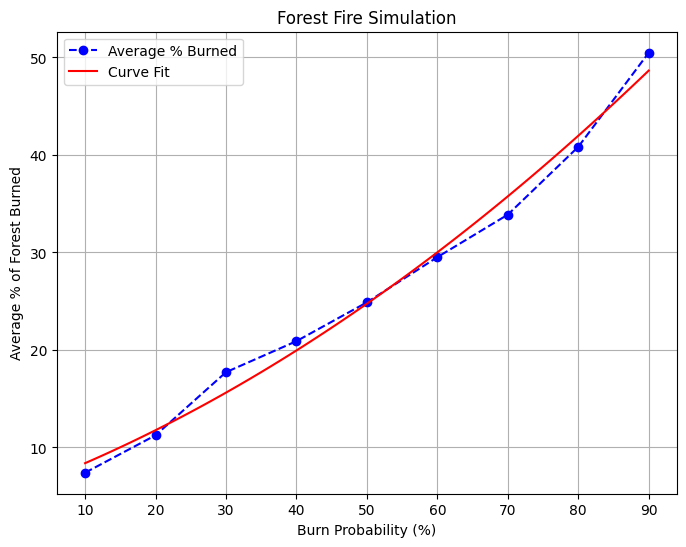

In [19]:
# Plot hasil eksperimen
plt.figure(figsize=(8, 6))
plt.plot(probabilities * 100, average_percent_burned, marker='o', linestyle='--', color='b', label='Average % Burned')
plt.xlabel('Burn Probability (%)')
plt.ylabel('Average % of Forest Burned')
plt.title('Forest Fire Simulation')
plt.grid(True)
plt.xticks(np.arange(10, 100, 10))
plt.yticks(np.arange(0, 101, 10))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

# Fitting kurva menggunakan polinomial orde 2
p = np.polyfit(probabilities * 100, average_percent_burned, 2)
x_curve = np.linspace(10, 90, 100)
y_curve = np.polyval(p, x_curve)
plt.plot(x_curve, y_curve, linestyle='-', color='r', label='Curve Fit')

plt.legend()

# Tampilkan plot
plt.show()